# IS 670 Assignment 2
---

#Introduction

In this assignment we aim to understand the factors influencing counties' voting behavior on gaming legalization ballots across the United States. Using a dataset of 1,287 unique records, we explored how demographic, economic, and social variables predict whether a county votes in favor of or against gaming. The ultimate goal was to leverage machine learning techniques to model and predict voting outcomes, contributing valuable insights into public opinion trends related to gaming legislation.<br>


###Methodology
We employed a comprehensive data mining approach, beginning with an extensive preprocessing phase to clean and prepare the dataset for analysis. This included handling missing values, normalizing numeric variables, and encoding categorical ones. We then conducted exploratory data analysis (EDA) to visualize the data and understand underlying patterns and correlations among the variables.

For the predictive modeling, three classification algorithms were chosen: Decision Trees, Naïve Bayes, and K-Nearest Neighbors (KNN). Each model was developed using a split of training and testing data, with performance evaluated through 5-fold cross-validation. Key metrics such as accuracy, sensitivity, and specificity, alongside confusion matrices, were used to compare the models' performance.

###Definitions
Dependent Variable: The outcome variable that the study aims to predict. In the context of this project, the dependent variable is whether a county votes "yes" or "no" on gaming legalization ballots.<br>

Independent Variables: The input variables used to predict the outcome of the dependent variable. These include demographic, economic, and social factors such as population, per capita income, unemployment rate, and racial composition.<br>

Exploratory Data Analysis (EDA): A process of analyzing and visualizing the dataset to uncover patterns, relationships, anomalies, and trends without making any formal predictions or inferences.<br>

Decision Trees: Central to the task, understanding how decision trees work, including how they split data based on features to make predictions, is crucial.

Preprocessing: The initial steps taken to prepare raw data for analysis. This includes cleaning the data (e.g., handling missing values and errors), normalizing or scaling numeric variables, and encoding categorical variables.<br>

Classification: A type of predictive modeling technique used to assign categories (classes) to various data points. The project focuses on classifying counties based on their voting behavior into "yes" or "no" categories.<br>

Naïve Bayes (NB): A classification technique based on Bayes' Theorem that assumes independence among predictors. It's particularly suited for classification tasks with high-dimensional data.<br>

K-Nearest Neighbors (KNN): A non-parametric method used for classification (and regression) tasks. It classifies data points based on the majority vote of its neighbors, with the data point being assigned to the class most common among its k nearest neighbors.<br>

Data Preprocessing: A critical step in preparing the dataset for modeling. This includes handling missing values, encoding categorical variables, dealing with outliers, and potentially balancing the dataset. These tasks directly impact the model's performance.

Model Evaluation Metrics: Understanding accuracy, sensitivity (recall), precision, and the F-measure is essential for assessing the decision tree model's performance.<br>

Feature Importance: Identifying which variables most significantly impact the prediction helps interpret the model and provides insights into the factors driving customer churn. This information can guide businesses in tailoring their customer retention strategies more effectively.<br>

5-Fold Cross-Validation: A model validation technique to assess how the results of a statistical analysis will generalize to an independent dataset. It divides the dataset into five parts, using four for training and one for testing, and iterates this process five times to reduce variability.<br>

Accuracy: The proportion of true results (both true positives and true negatives) among the total number of cases examined.<br>

Sensitivity (Recall): The ability of a test to correctly identify true positives, i.e., the percentage of actual positives correctly identified by the model.<br>

Specificity: The ability of the test to correctly identify true negatives, i.e., the percentage of actual negatives correctly identified by the model.<br>

Confusion Matrix: A table used to describe the performance of a classification model on a set of test data for which the true values are known. It allows easy visualization of the performance of an algorithm.<br>

##Data Understanding and Preprocessing
####Upload Data
Mount Google Drive to access the dataset stored in Google Drive.
Import necessary libraries for data manipulation and visualization.


####Data Cleaning
Check the column names and select the desired columns. Replace '1' and '0' with 'Yes' and 'No' in the target column 'churn'. Check for missing values. Examine variable types and convert categorical variables to the 'category' data type.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

In [ ]:
# Read data
GamingBallotDataSet = pd.read_csv("/content/drive/MyDrive/IS670_data/GamingBallotDataSet.csv")
GamingBallotDataSet

,State No,County No,FOR,AGAINST,TOTAL CASTE,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,...,UNEMPLOYMENT RATE,AGE LESS THAN 18,AGE24,AGE44,AGE64,AGE OLDER THAN 65,MSA,PERCENT MINORITY,NO OF OLDER,NO OF YOUNGER
0,1,1,42385,22992,65377,1,1,265038,"$15,607","$34,618",...,5.0,80600,22627,94724,46933,20154,1,0.25,67087,189448
1,1,2,2015,1852,3867,1,1,13617,"$13,740","$23,114",...,7.0,4285,1861,4092,2114,1265,2,0.40,3379,8184
2,1,3,51959,48406,100365,1,1,391511,"$24,187","$44,874",...,3.0,111243,29574,150740,70783,29171,1,0.15,99954,301480
3,1,4,957,856,1813,1,1,5345,"$12,816","$27,359",...,5.0,1647,229,1670,1178,621,2,0.26,1799,3340
4,1,5,942,1129,2071,0,1,4556,"$19,017","$23,054",...,1.0,1192,220,1231,973,940,2,0.07,1913,2462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,18,41,44069,27316,71385,1,1,354527,"$18,893","$27,622",...,15.6,124607,30781,100927,62657,35555,1,0.50,98212,201854
1283,18,42,10026,9755,19781,1,1,53029,"$20,082","$33,810",...,8.0,11972,3497,16099,12015,9446,2,0.13,21461,32198
1284,18,43,126397,76905,203302,1,1,732143,"$28,711","$49,763",...,5.6,208062,65744,235177,146412,76748,1,0.38,223160,470354
1285,18,44,26412,23464,49876,1,1,153293,"$25,791","$38,751",...,5.4,39727,23948,46570,27627,15421,1,0.35,43048,93140


In [ ]:
GamingBallotDataSet.keys()

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')

In [ ]:
print(GamingBallotDataSet.columns)

Index(['State No', 'County No', 'FOR', 'AGAINST', 'TOTAL CASTE',
       'DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI',
       'MEDIUM FAMILY INCOME', 'SIZE OF COUNTY', 'POPULATION DENSITY',
       'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE',
       'PERCENT FEMALE', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS',
       'PERCENT CHURCH MEMBERS OF POPULATION', 'POVERTY LEVEL',
       'UNEMPLOYMENT RATE', 'AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64',
       'AGE OLDER THAN 65', 'MSA', 'PERCENT MINORITY', 'NO OF OLDER',
       'NO OF YOUNGER'],
      dtype='object')


In [ ]:
Q1 = GamingBallotDataSet.quantile(0.25)
Q3 = GamingBallotDataSet.quantile(0.75)
IQR = Q3 - Q1
filtered = GamingBallotDataSet[~((GamingBallotDataSet < (Q1 - 1.5 * IQR)) |(GamingBallotDataSet > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-720-a417bca2b8f2>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = GamingBallotDataSet.quantile(0.25)
<ipython-input-720-a417bca2b8f2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = GamingBallotDataSet.quantile(0.75)
<ipython-input-720-a417bca2b8f2>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  filtered = GamingBallotDataSet[~((GamingBallotDataSet < (Q1 - 1.5 * IQR)) |(GamingBallotDataSet > (Q3 + 1.5 * IQR))).any(axis=1)]


<ipython-input-721-a14937b45c55>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = GamingBallotDataSet.corr()
<ipython-input-721-a14937b45c55>:15: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sns.heatmap(GamingBallotDataSet[high_corr_vars].corr(), annot=True, cmap="RdYlGn")


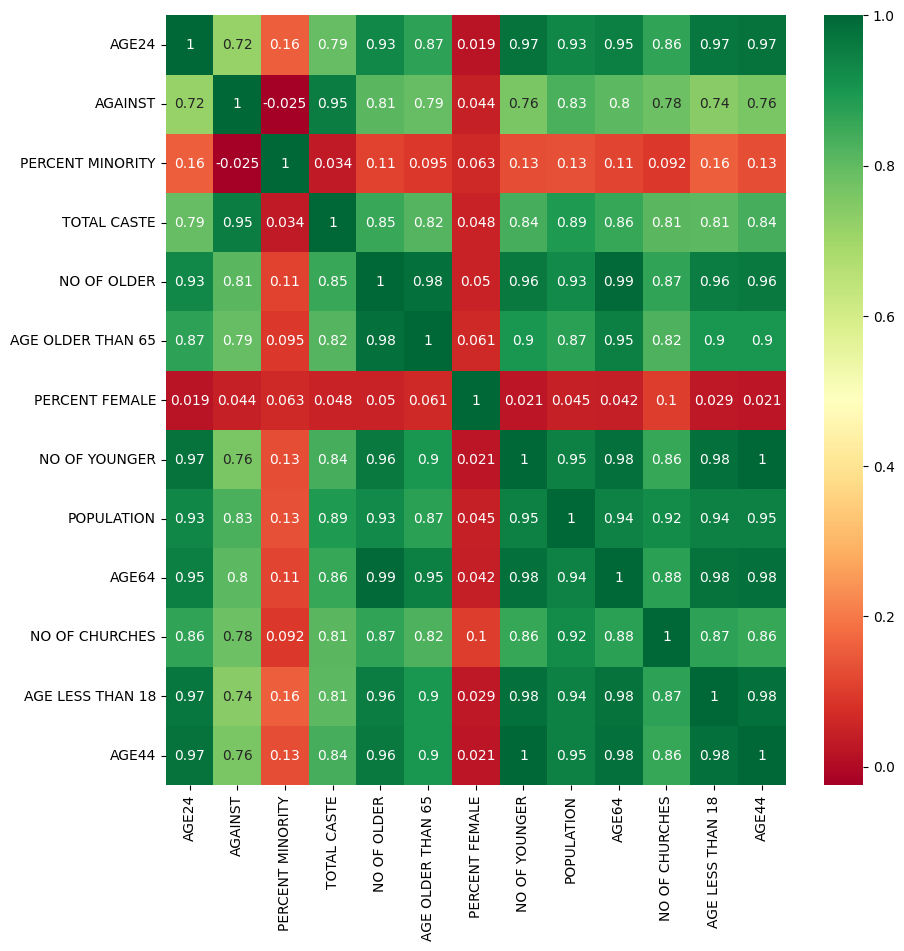

In [ ]:
# Calculate the correlation matrix
corr_matrix = GamingBallotDataSet.corr()

# Find pairs of highly correlated features
high_corr_vars = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_vars.add(colname)

# Plot heatmap for highly correlated variables only if any
if high_corr_vars:
    plt.figure(figsize=(10, 10))
    sns.heatmap(GamingBallotDataSet[high_corr_vars].corr(), annot=True, cmap="RdYlGn")
    plt.show()
else:
    print("No highly correlated variables found with threshold of 0.8")


###Reasons behind the choice of desired varbles

State No' and 'County No': These are likely categorical identifiers for states and counties and may not have predictive power by themselves. They could be used for stratified sampling if needed but are typically not used in the modeling.<br>

'FOR', 'AGAINST', 'TOTAL CASTE': These variables seem to be related to the results of the ballot, and 'TOTAL CASTE' could be a derivative of 'FOR' and 'AGAINST'. If 'DEPENDENT VARIABLE' is determined by 'FOR' and 'AGAINST', these should be excluded to avoid data leakage.<br>

'DEPENDENT VARIABLE': This is the target variable we are trying to predict.<br>

Demographic Variables ('POPULATION', 'PERCENT WHITE', 'PERCENT BLACK', 'PERCENT OTHER', 'PERCENT MALE', 'PERCENT FEMALE'): These variables are fundamental demographics. However, 'PERCENT MALE' and 'PERCENT FEMALE' are directly related (they should add up to 100%), so one can be excluded to avoid redundancy. 'POPULATION DENSITY' might be a better fit than 'POPULATION' as it normalizes population by area.<br>

Economic Variables ('PCI', 'MEDIUM FAMILY INCOME', 'POVERTY LEVEL', 'UNEMPLOYMENT RATE'): These can have predictive power as they reflect the economic status of the area. However, 'PCI' (per capita income) and 'MEDIUM FAMILY INCOME' might be correlated, and you may choose one based on which has a stronger relationship with the target variable.<br>

Age Variables ('AGE LESS THAN 18', 'AGE24', 'AGE44', 'AGE64', 'AGE OLDER THAN 65', 'NO OF OLDER', 'NO OF YOUNGER'): Variables like 'AGE44', 'AGE64', and 'NO OF OLDER' are highly correlated, as seen in the heatmap. So, using this might lead to redundant data<br>

'MSA' (Metropolitan Statistical Area): This can be a significant variable as it indicates whether the county is urban or rural, which might influence voting behavior.<br>

'PERCENT MINORITY': If this variable includes all minorities and is not highly correlated with 'PERCENT WHITE', 'PERCENT BLACK', or 'PERCENT OTHER', it can be a useful single variable to reflect the diversity of the population.<br>

'SIZE OF COUNTY', 'NO OF CHURCHES', 'NO OF CHURCH MEMBERS': 'SIZE OF COUNTY' might be useful for normalizing other variables, while 'NO OF CHURCHES' and 'NO OF CHURCH MEMBERS' could be indicative of the social environment.<br>

'BALLOT TYPE': If this refers to the type of ballot issue and it varies across the dataset, it could be significant for the model, as different issues may influence voting behavior differently.<br>

Each choice is to minimize multicollinearity, reflect important socio-economic factors, and ensure a diverse set of features that might influence the voting behavior related to gaming legalization. Remember, feature selection should be an iterative process, with each choice validated through model performance and significance testing where appropriate.<br>

In [ ]:
# Select the desired columns only
desired_columns = desired_variables = ['DEPENDENT VARIABLE', 'BALLOT TYPE', 'POPULATION', 'PCI', 'MEDIUM FAMILY INCOME',
    'POVERTY LEVEL', 'UNEMPLOYMENT RATE', 'PERCENT WHITE', 'PERCENT BLACK',
    'PERCENT OTHER', 'PERCENT MINORITY', 'PERCENT MALE', 'MSA',
    'SIZE OF COUNTY', 'AGE LESS THAN 18']
Data_desired = GamingBallotDataSet [desired_columns]

In [ ]:
for column in desired_columns:
    print(f"Descriptive statistics for {column}:")
    print(GamingBallotDataSet[column].describe(), "\n")

Descriptive statistics for DEPENDENT VARIABLE:
count    1287.000000
mean        0.425796
std         0.494655
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: DEPENDENT VARIABLE, dtype: float64 

Descriptive statistics for BALLOT TYPE:
count    1287.000000
mean        1.542347
std         0.498397
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: BALLOT TYPE, dtype: float64 

Descriptive statistics for POPULATION:
count    1.287000e+03
mean     5.247528e+04
std      1.097376e+05
min      3.270000e+02
25%      6.541500e+03
50%      1.612600e+04
75%      4.313700e+04
max      1.206243e+06
Name: POPULATION, dtype: float64 

Descriptive statistics for PCI:
count         1287
unique        1177
top       $15,494 
freq             3
Name: PCI, dtype: object 

Descriptive statistics for MEDIUM FAMILY INCOME:
count         1287
unique        1216
top       $32,288 
freq   

**Note**
Creating a copy of the dataset prevents alterations to the original data, and replacing numerical labels with 'Yes' or 'No' enhances the interpretability of the target variable.

In [ ]:
# Replacing Y with Yes and N with No in the target column 'DEPENDENT VARIABLE'
GamingBallotDataSet = Data_desired.copy()
GamingBallotDataSet.loc[:, 'DEPENDENT VARIABLE'] = GamingBallotDataSet['DEPENDENT VARIABLE'].replace({1: 'No', 0: 'Yes'})

In [ ]:
# Show the head rows of a data frame
GamingBallotDataSet.head()

,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,PCI,MEDIUM FAMILY INCOME,POVERTY LEVEL,UNEMPLOYMENT RATE,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MINORITY,PERCENT MALE,MSA,SIZE OF COUNTY,AGE LESS THAN 18
0,No,1,265038,"$15,607","$34,618",10.4,5.0,0.75,0.03,0.22,0.25,0.496,1,1192.0,80600
1,No,1,13617,"$13,740","$23,114",24.8,7.0,0.59,0.00,0.40,0.40,0.491,2,722.8,4285
2,No,1,391511,"$24,187","$44,874",5.9,3.0,0.85,0.06,0.09,0.15,0.488,1,803.2,111243
3,No,1,5345,"$12,816","$27,359",16.9,5.0,0.74,0.00,0.26,0.26,0.510,2,1349.4,1647
4,Yes,1,4556,"$19,017","$23,054",19.0,1.0,0.93,0.00,0.07,0.07,0.495,2,2555.9,1192


In [ ]:
# Examine missing values again
GamingBallotDataSet.isnull().sum()

DEPENDENT VARIABLE      0
BALLOT TYPE             0
POPULATION              0
PCI                     0
MEDIUM FAMILY INCOME    0
POVERTY LEVEL           0
UNEMPLOYMENT RATE       0
PERCENT WHITE           0
PERCENT BLACK           0
PERCENT OTHER           0
PERCENT MINORITY        0
PERCENT MALE            0
MSA                     0
SIZE OF COUNTY          0
AGE LESS THAN 18        0
dtype: int64

In [ ]:
# Set missing values as none
GamingBallotDataSet = GamingBallotDataSet.fillna('None')

In [ ]:
# Examine missing values again
GamingBallotDataSet.isnull().sum()

DEPENDENT VARIABLE      0
BALLOT TYPE             0
POPULATION              0
PCI                     0
MEDIUM FAMILY INCOME    0
POVERTY LEVEL           0
UNEMPLOYMENT RATE       0
PERCENT WHITE           0
PERCENT BLACK           0
PERCENT OTHER           0
PERCENT MINORITY        0
PERCENT MALE            0
MSA                     0
SIZE OF COUNTY          0
AGE LESS THAN 18        0
dtype: int64

In [ ]:
# Examine variable type
Data_desired.dtypes

DEPENDENT VARIABLE        int64
BALLOT TYPE               int64
POPULATION                int64
PCI                      object
MEDIUM FAMILY INCOME     object
POVERTY LEVEL           float64
UNEMPLOYMENT RATE       float64
PERCENT WHITE           float64
PERCENT BLACK           float64
PERCENT OTHER           float64
PERCENT MINORITY        float64
PERCENT MALE            float64
MSA                       int64
SIZE OF COUNTY          float64
AGE LESS THAN 18          int64
dtype: object

In [ ]:
# Change categorical variables to "category"
GamingBallotDataSet['DEPENDENT VARIABLE'] = GamingBallotDataSet['DEPENDENT VARIABLE'].astype('category')
GamingBallotDataSet['PCI'] = GamingBallotDataSet['PCI'].astype('category')
GamingBallotDataSet['MEDIUM FAMILY INCOME'] = GamingBallotDataSet['MEDIUM FAMILY INCOME'].astype('category')

In [ ]:
# Examine variable type
Data_desired.dtypes

DEPENDENT VARIABLE        int64
BALLOT TYPE               int64
POPULATION                int64
PCI                      object
MEDIUM FAMILY INCOME     object
POVERTY LEVEL           float64
UNEMPLOYMENT RATE       float64
PERCENT WHITE           float64
PERCENT BLACK           float64
PERCENT OTHER           float64
PERCENT MINORITY        float64
PERCENT MALE            float64
MSA                       int64
SIZE OF COUNTY          float64
AGE LESS THAN 18          int64
dtype: object

In [ ]:
GamingBallotDataSet.describe()

,BALLOT TYPE,POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MINORITY,PERCENT MALE,MSA,SIZE OF COUNTY,AGE LESS THAN 18
count,1287.000000,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000,1287.000000
mean,1.542347,5.247528e+04,17.409169,6.050505,0.804375,0.080389,0.114740,0.195602,0.493632,1.781663,1000.487801,14419.316239
std,0.498397,1.097376e+05,7.214297,3.410285,0.189326,0.133848,0.167745,0.189275,0.020111,0.413278,778.794180,30487.082118
min,1.000000,3.270000e+02,3.200000,0.600000,0.030000,0.000000,0.000000,0.000000,0.246000,1.000000,120.800000,87.000000
25%,1.000000,6.541500e+03,12.100000,3.600000,0.700000,0.000000,0.010000,0.040000,0.483000,2.000000,534.250000,1790.500000
50%,2.000000,1.612600e+04,16.200000,5.400000,0.860000,0.020000,0.050000,0.140000,0.491000,2.000000,832.500000,4568.000000
75%,2.000000,4.313700e+04,21.450000,7.600000,0.960000,0.095000,0.140000,0.300000,0.500000,2.000000,1140.450000,12004.000000
max,2.000000,1.206243e+06,49.900000,38.500000,1.000000,0.800000,0.970000,0.970000,0.671000,2.000000,6347.800000,353009.000000


##Vizualizing the data
Use different types of graphs to get a visual idea of how the data is distributed over different things.

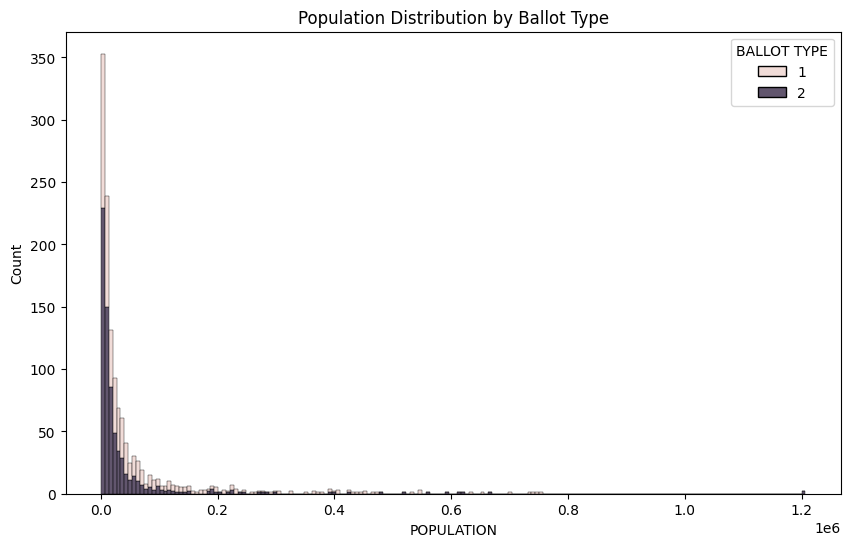

In [ ]:
# Population Distribution by Ballot Type
plt.figure(figsize=(10, 6))
sns.histplot(data=GamingBallotDataSet, x='POPULATION', hue='BALLOT TYPE', multiple='stack')
plt.title('Population Distribution by Ballot Type')
plt.show()

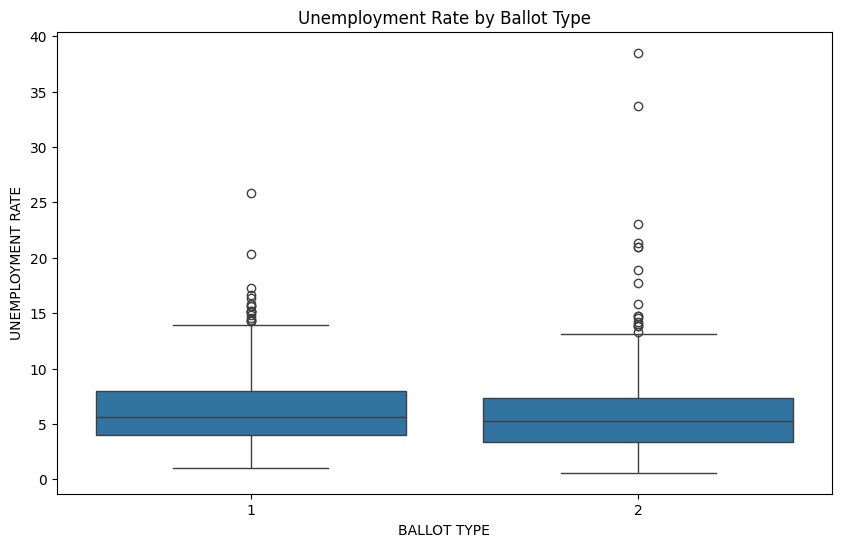

In [ ]:
# Unemployment Rate by Ballot Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='BALLOT TYPE', y='UNEMPLOYMENT RATE', data=GamingBallotDataSet)
plt.title('Unemployment Rate by Ballot Type')
plt.show()

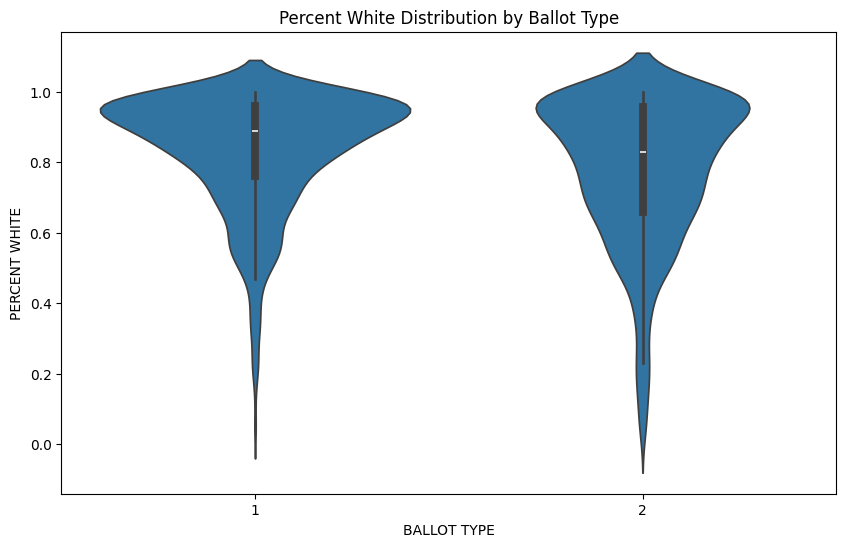

In [ ]:
# Percent White Distribution by Ballot Type
plt.figure(figsize=(10, 6))
sns.violinplot(x='BALLOT TYPE', y='PERCENT WHITE', data=GamingBallotDataSet)
plt.title('Percent White Distribution by Ballot Type')
plt.show()

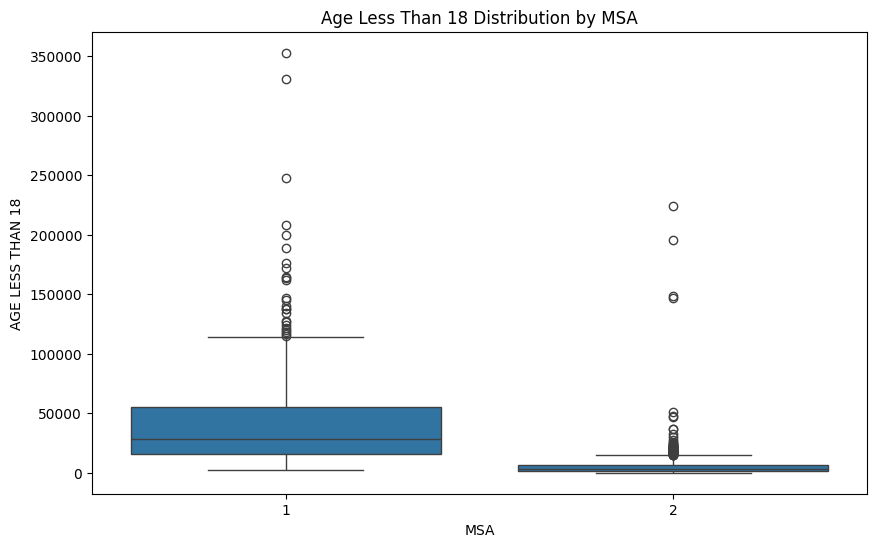

In [ ]:
# Age Less Than 18 Distribution by MSA
plt.figure(figsize=(10, 6))
sns.boxplot(x='MSA', y='AGE LESS THAN 18', data=GamingBallotDataSet)
plt.title('Age Less Than 18 Distribution by MSA')
plt.show()

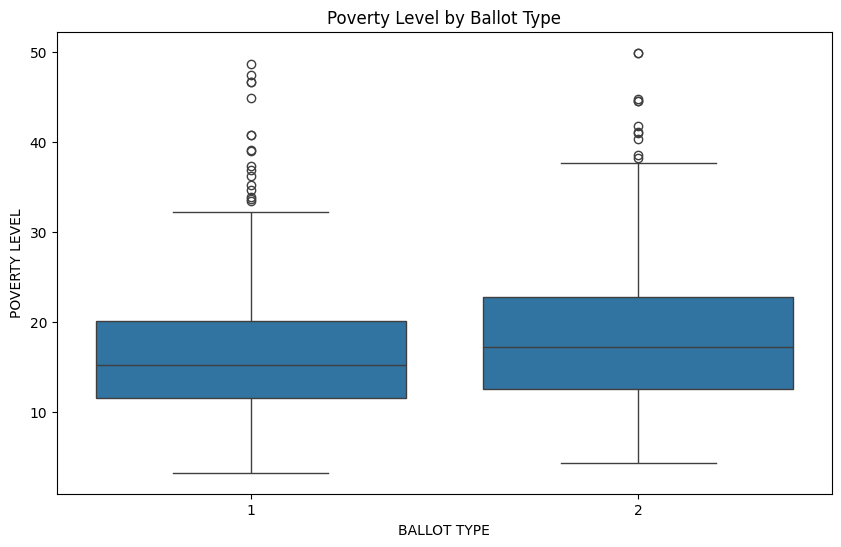

In [ ]:
# Poverty Level by Ballot Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='BALLOT TYPE', y='POVERTY LEVEL', data=GamingBallotDataSet)
plt.title('Poverty Level by Ballot Type')
plt.show()

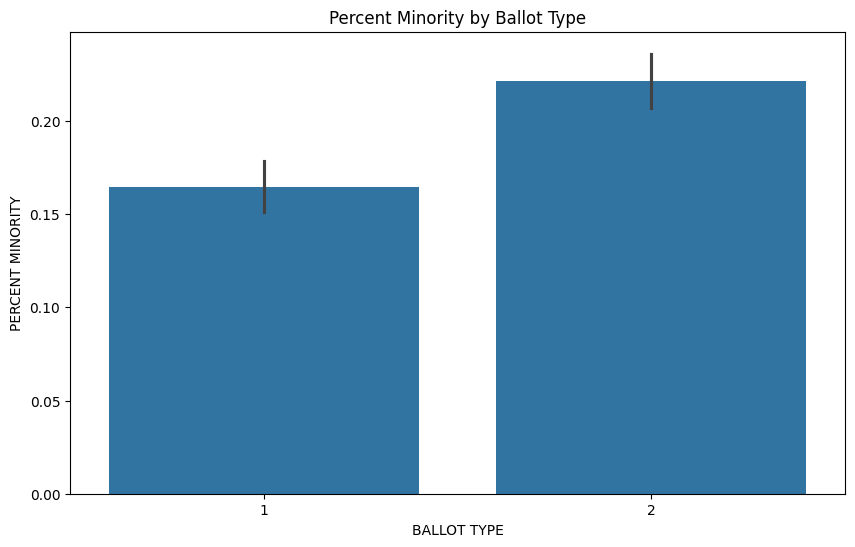

In [ ]:
# Percent Minority by Ballot Type
plt.figure(figsize=(10, 6))
sns.barplot(x='BALLOT TYPE', y='PERCENT MINORITY', data=GamingBallotDataSet)
plt.title('Percent Minority by Ballot Type')
plt.show()

Text(0.5, 1.0, 'Distribution of Medium Family Income')

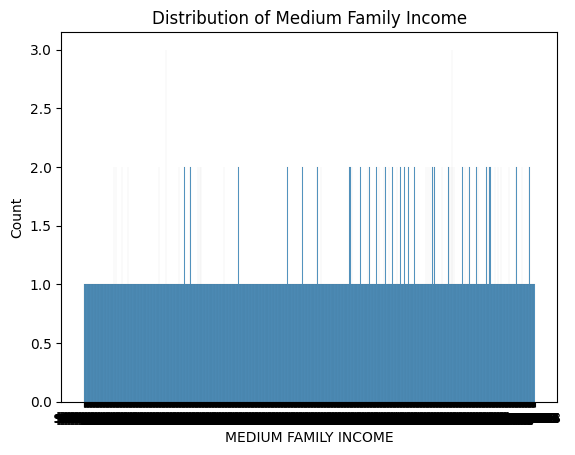

In [ ]:
sns.histplot(data=GamingBallotDataSet, x='MEDIUM FAMILY INCOME')
plt.title('Distribution of Medium Family Income')

##Partition the data set into required subsets

####Convert Categorical Variables to Dummy Variables

Convert categorical variables to dummy variables for model compatibility.

####Balance the Training Data

Undersample the majority class to balance the dataset. Split the balanced dataset into training and testing sets.


**Note** This step is not needed here as the "DEPENDENT VARIABLE" is the target variable here and is not to be converted into a dummy variable

In [ ]:
# Convert categorical variables to dummy variables
Data_desired = pd.get_dummies(Data_desired, columns=['PCI' , 'MEDIUM FAMILY INCOME'], drop_first=True)
Data_desired

,DEPENDENT VARIABLE,BALLOT TYPE,POPULATION,POVERTY LEVEL,UNEMPLOYMENT RATE,PERCENT WHITE,PERCENT BLACK,PERCENT OTHER,PERCENT MINORITY,PERCENT MALE,...,"MEDIUM FAMILY INCOME_$48,050","MEDIUM FAMILY INCOME_$48,711","MEDIUM FAMILY INCOME_$49,547","MEDIUM FAMILY INCOME_$49,638","MEDIUM FAMILY INCOME_$49,763","MEDIUM FAMILY INCOME_$49,781","MEDIUM FAMILY INCOME_$52,006","MEDIUM FAMILY INCOME_$52,976","MEDIUM FAMILY INCOME_$54,244","MEDIUM FAMILY INCOME_$55,643"
0,1,1,265038,10.4,5.0,0.75,0.03,0.22,0.25,0.496,...,0,0,0,0,0,0,0,0,0,0
1,1,1,13617,24.8,7.0,0.59,0.00,0.40,0.40,0.491,...,0,0,0,0,0,0,0,0,0,0
2,1,1,391511,5.9,3.0,0.85,0.06,0.09,0.15,0.488,...,0,0,0,0,0,0,0,0,0,0
3,1,1,5345,16.9,5.0,0.74,0.00,0.26,0.26,0.510,...,0,0,0,0,0,0,0,0,0,0
4,0,1,4556,19.0,1.0,0.93,0.00,0.07,0.07,0.495,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,1,1,354527,27.9,15.6,0.49,0.01,0.49,0.50,0.498,...,0,0,0,0,0,0,0,0,0,0
1283,1,1,53029,14.8,8.0,0.87,0.03,0.10,0.13,0.526,...,0,0,0,0,0,0,0,0,0,0
1284,1,1,732143,10.3,5.6,0.62,0.02,0.36,0.38,0.505,...,0,0,0,0,1,0,0,0,0,0
1285,1,1,153293,15.8,5.4,0.65,0.02,0.33,0.35,0.497,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Examine the porportion of target variable for data set
target = Data_desired['DEPENDENT VARIABLE']
print(target.value_counts(normalize=True))

0    0.574204
1    0.425796
Name: DEPENDENT VARIABLE, dtype: float64


In [ ]:
# Partition the data
predictors = Data_desired.drop(['DEPENDENT VARIABLE'],axis=1)
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(900, 2403) (387, 2403) (900,) (387,)


In [ ]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 'Yes']
minority_df = combined_train_df[combined_train_df['DEPENDENT VARIABLE'] == 'No']

# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=len(minority_df), random_state=5)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=5)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['DEPENDENT VARIABLE'])
target_train = balanced_data['DEPENDENT VARIABLE']

In [ ]:
print("Combined train DataFrame shape:", combined_train_df.shape)
print("DEPENDENT VARIABLE value counts in combined DataFrame:\n", combined_train_df['DEPENDENT VARIABLE'].value_counts())

Combined train DataFrame shape: (900, 2404)
DEPENDENT VARIABLE value counts in combined DataFrame:
 0    529
1    371
Name: DEPENDENT VARIABLE, dtype: int64


In [ ]:
print("Majority class shape:", majority_df.shape)
print("Minority class shape:", minority_df.shape)

Majority class shape: (0, 2404)
Minority class shape: (0, 2404)


In [ ]:
print("Balanced data shape:", balanced_data.shape)
print("DEPENDENT VARIABLE value counts in balanced data:\n", balanced_data['DEPENDENT VARIABLE'].value_counts())

Balanced data shape: (0, 2404)
DEPENDENT VARIABLE value counts in balanced data:
 Series([], Name: DEPENDENT VARIABLE, dtype: int64)


In [ ]:
# Examine the porportion of target variable for train set
print(target_train.value_counts(normalize=True), target_train.shape)

Series([], Name: DEPENDENT VARIABLE, dtype: float64) (0,)


In [ ]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

0    0.542636
1    0.457364
Name: DEPENDENT VARIABLE, dtype: float64


In [ ]:
predictors = Data_desired.drop(['DEPENDENT VARIABLE'], axis=1)
target = Data_desired['DEPENDENT VARIABLE']

##Decision Tree

In [ ]:
X = Data_desired.drop(['DEPENDENT VARIABLE'], axis=1)
y = Data_desired['DEPENDENT VARIABLE']

# Split the data
predictors_train, predictors_test, target_train, target_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(predictors_train.shape)
print(target_train.shape)

(900, 2403)
(900,)


In [ ]:
# Build a decision tree model on training data with max_depth = 4
model = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 4)
model.fit(predictors_train, target_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)

In [ ]:
# Perform 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(model, predictors, target, cv=5)

# Print each cv score (accuracy) and the mean of the cv scores
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.53875969 0.63178295 0.37354086 0.34241245 0.50583658]
cv_scores mean:0.47846650378547945


[Text(0.5, 0.9, 'PERCENT WHITE <= 0.705\nentropy = 0.978\nsamples = 900\nvalue = [529, 371]\nclass = No'),
 Text(0.25, 0.7, 'SIZE OF COUNTY <= 783.2\nentropy = 0.951\nsamples = 227\nvalue = [84, 143]\nclass = Yes'),
 Text(0.125, 0.5, 'MSA <= 1.5\nentropy = 0.999\nsamples = 105\nvalue = [54, 51]\nclass = No'),
 Text(0.0625, 0.3, 'UNEMPLOYMENT RATE <= 6.95\nentropy = 0.559\nsamples = 23\nvalue = [3, 20]\nclass = Yes'),
 Text(0.03125, 0.1, 'entropy = 0.0\nsamples = 12\nvalue = [0, 12]\nclass = Yes'),
 Text(0.09375, 0.1, 'entropy = 0.845\nsamples = 11\nvalue = [3, 8]\nclass = Yes'),
 Text(0.1875, 0.3, 'PERCENT BLACK <= 0.615\nentropy = 0.957\nsamples = 82\nvalue = [51, 31]\nclass = No'),
 Text(0.15625, 0.1, 'entropy = 0.923\nsamples = 77\nvalue = [51, 26]\nclass = No'),
 Text(0.21875, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Yes'),
 Text(0.375, 0.5, 'SIZE OF COUNTY <= 890.2\nentropy = 0.805\nsamples = 122\nvalue = [30, 92]\nclass = Yes'),
 Text(0.3125, 0.3, 'MEDIUM FAMILY 

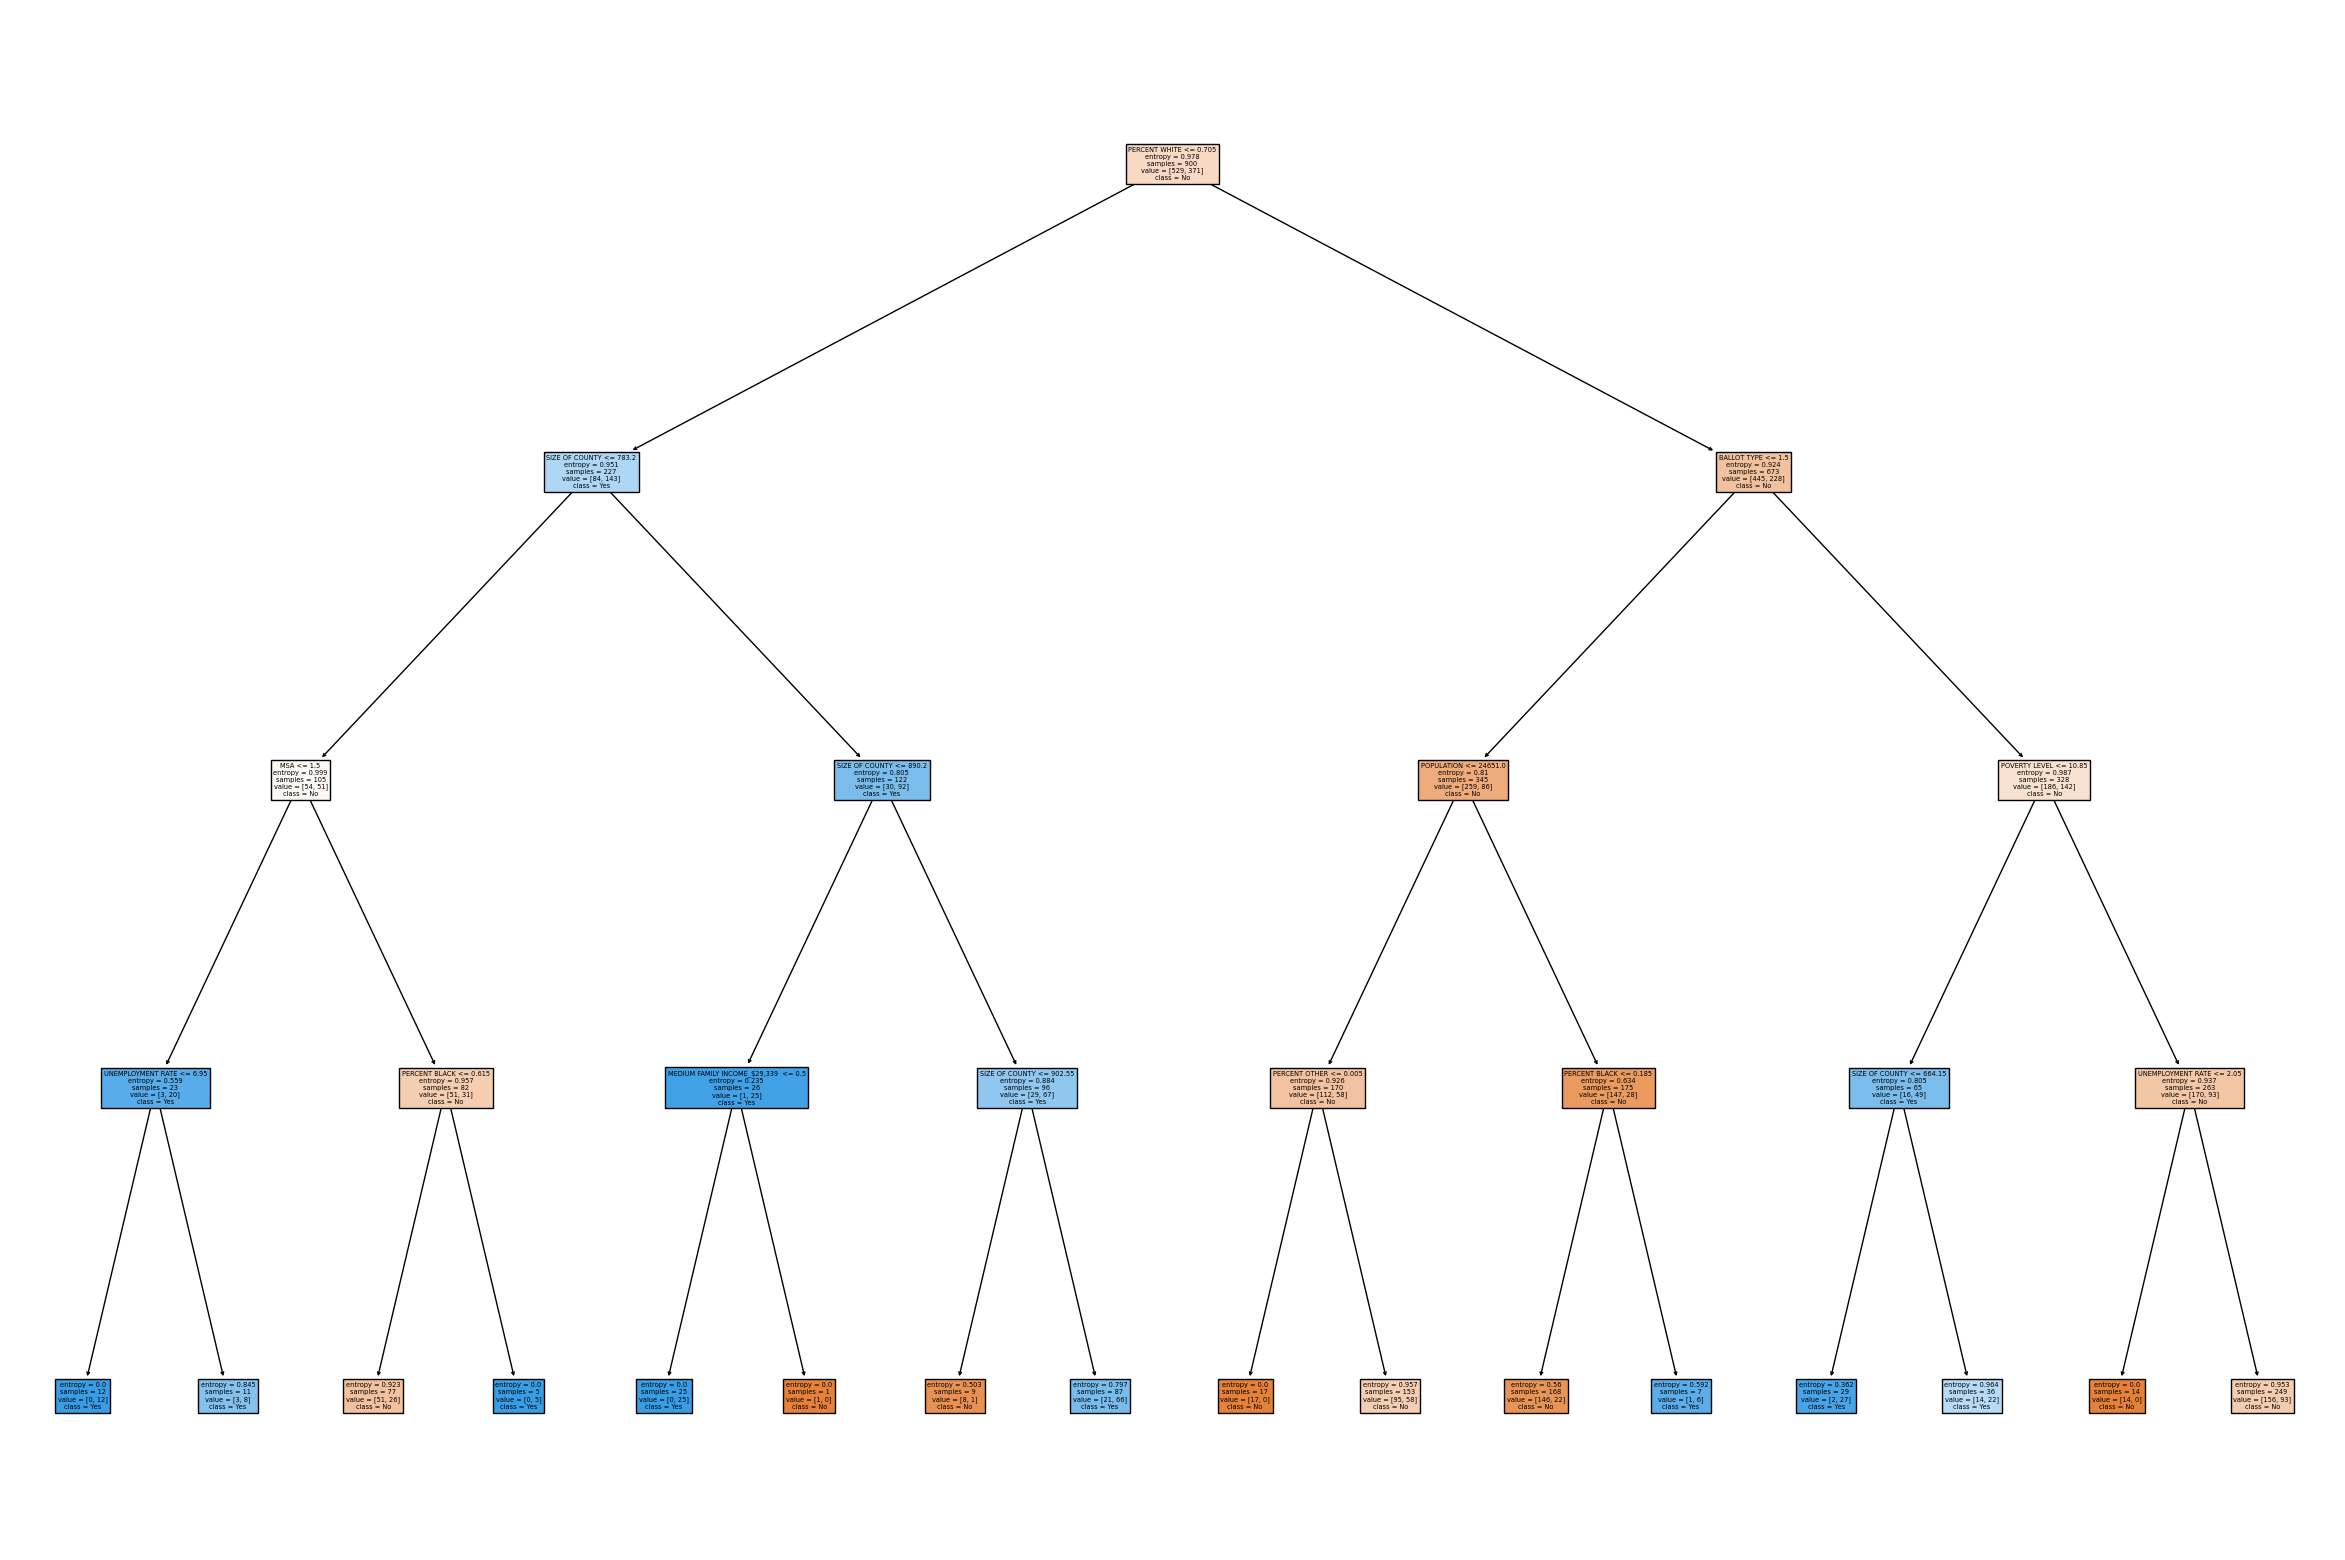

In [ ]:
# Plot the tree
fig = plt.figure(figsize=(30,20))
tree.plot_tree(model,
               feature_names=list(predictors_train.columns),
               class_names=['No','Yes'],
               filled=True)

In [ ]:
print(tree.export_text(model, feature_names=predictors_train.columns.tolist()))

|--- PERCENT WHITE <= 0.70
|   |--- SIZE OF COUNTY <= 783.20
|   |   |--- MSA <= 1.50
|   |   |   |--- UNEMPLOYMENT RATE <= 6.95
|   |   |   |   |--- class: 1
|   |   |   |--- UNEMPLOYMENT RATE >  6.95
|   |   |   |   |--- class: 1
|   |   |--- MSA >  1.50
|   |   |   |--- PERCENT BLACK <= 0.62
|   |   |   |   |--- class: 0
|   |   |   |--- PERCENT BLACK >  0.62
|   |   |   |   |--- class: 1
|   |--- SIZE OF COUNTY >  783.20
|   |   |--- SIZE OF COUNTY <= 890.20
|   |   |   |--- MEDIUM FAMILY INCOME_$29,339  <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- MEDIUM FAMILY INCOME_$29,339  >  0.50
|   |   |   |   |--- class: 0
|   |   |--- SIZE OF COUNTY >  890.20
|   |   |   |--- SIZE OF COUNTY <= 902.55
|   |   |   |   |--- class: 0
|   |   |   |--- SIZE OF COUNTY >  902.55
|   |   |   |   |--- class: 1
|--- PERCENT WHITE >  0.70
|   |--- BALLOT TYPE <= 1.50
|   |   |--- POPULATION <= 24651.00
|   |   |   |--- PERCENT OTHER <= 0.00
|   |   |   |   |--- class: 0
|   |   |   |--- PER

                            Feature  Importance
4                     PERCENT WHITE    0.214064
10                   SIZE OF COUNTY    0.191504
2                     POVERTY LEVEL    0.125522
5                     PERCENT BLACK    0.101749
0                       BALLOT TYPE    0.092718
9                               MSA    0.068784
3                 UNEMPLOYMENT RATE    0.063879
1                        POPULATION    0.055858
6                     PERCENT OTHER    0.055095
2015  MEDIUM FAMILY INCOME_$29,339     0.030828


<ipython-input-755-ff0a2bfbf14e>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')


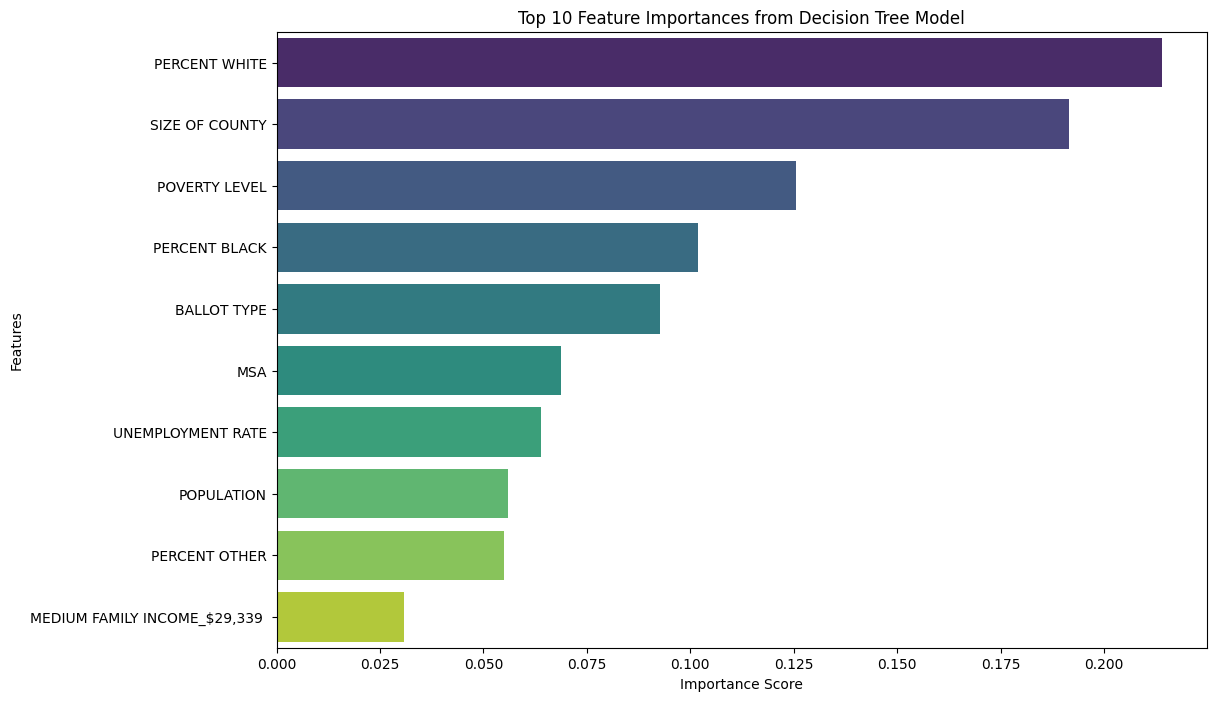

In [ ]:
importances = model.feature_importances_
feature_names = predictors.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df.head(10))

plt.figure(figsize=(12, 8))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette='viridis')

plt.title('Top 10 Feature Importances from Decision Tree Model')
plt.xlabel('Importance Score')
plt.ylabel('Features')

plt.show()

In [ ]:
feature_importances = model.feature_importances_
features = predictors_train.columns
importances = pd.DataFrame({'Feature': features, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)
print(importances.head())

           Feature  Importance
4    PERCENT WHITE    0.214064
10  SIZE OF COUNTY    0.191504
2    POVERTY LEVEL    0.125522
5    PERCENT BLACK    0.101749
0      BALLOT TYPE    0.092718


In [ ]:
# Make predictions on the training data
prediction_on_train_DT = model.predict(predictors_train)

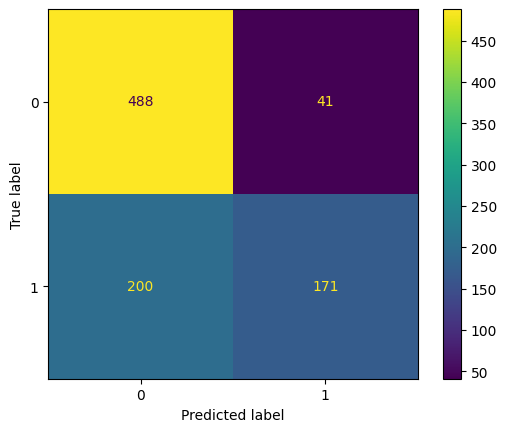

In [ ]:
# Examine the evaluation results on train data: confusion_matrix
cm_train = confusion_matrix(target_train, prediction_on_train_DT)
ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train_DT))

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       529
           1       0.81      0.46      0.59       371

    accuracy                           0.73       900
   macro avg       0.76      0.69      0.69       900
weighted avg       0.75      0.73      0.71       900



In [ ]:
# Make predictions on testing data
prediction_on_test_DT = model.predict(predictors_test)

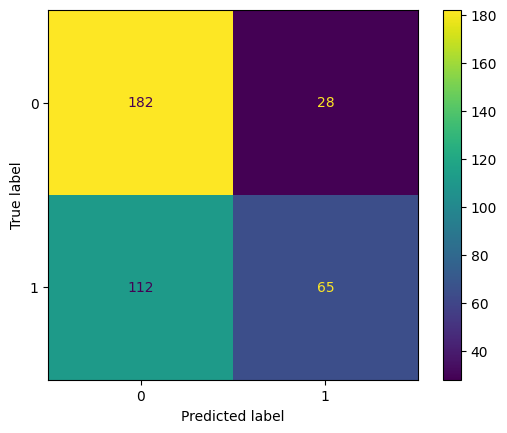

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test_DT)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score
print(classification_report(target_test, prediction_on_test_DT))

              precision    recall  f1-score   support

           0       0.62      0.87      0.72       210
           1       0.70      0.37      0.48       177

    accuracy                           0.64       387
   macro avg       0.66      0.62      0.60       387
weighted avg       0.66      0.64      0.61       387



In [ ]:
accuracy_dt = accuracy_score(target_test, prediction_on_test_DT)
sensitivity_dt = recall_score(target_test, prediction_on_test_DT, pos_label=1, average='binary')
print(f"Decision Tree - Accuracy: {accuracy_dt}, Sensitivity: {sensitivity_dt}")

Decision Tree - Accuracy: 0.6382428940568475, Sensitivity: 0.3672316384180791


##Naive Bayes

In [ ]:
# Build a Naive Bayes model on training data with default setting (1 point)
model_NB = MultinomialNB()

# Fit the Naive Bayes model with training data
model_NB.fit(predictors_train, target_train)

MultinomialNB()

In [ ]:
# Perform 5-fold cross-validation on the entire dataset
nb_model = MultinomialNB()
cv_scores_nb = cross_val_score(nb_model, predictors, target, cv=5)
print("Naïve Bayes CV scores:", cv_scores_nb)
print("Naïve Bayes CV mean score:", np.mean(cv_scores_nb))

Naïve Bayes CV scores: [0.42635659 0.48449612 0.39688716 0.52529183 0.50972763]
Naïve Bayes CV mean score: 0.4685518655928574


In [ ]:
# Make predictions on testing data
prediction_on_train_NB = model_NB.predict(predictors_train)

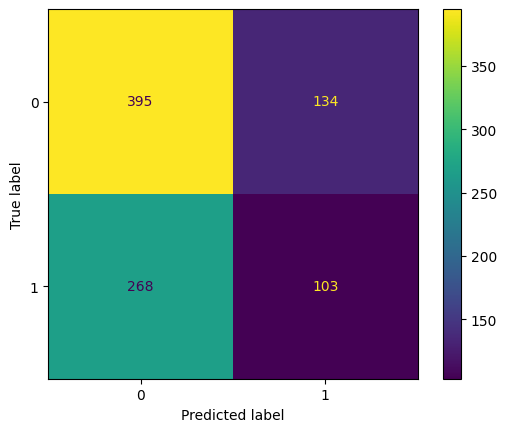

In [ ]:
cm_NB = confusion_matrix(target_train, prediction_on_train_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()

In [ ]:
# Make predictions on testing data
prediction_on_test_NB = model_NB.predict(predictors_test)

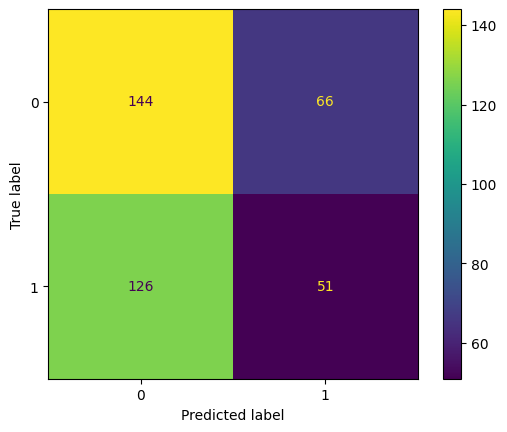

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm_NB = confusion_matrix(target_test, prediction_on_test_NB)
ConfusionMatrixDisplay(confusion_matrix=cm_NB, display_labels=model_NB.classes_).plot()
#plot_confusion_matrix(model, predictors_test, target_test, cmap=plt.cm.Blues, values_format='d')e

In [ ]:
# Classification report for Naive Bayes on training set
train_predictions_NB = model_NB.predict(predictors_train)
print(classification_report(target_train, train_predictions_NB))

              precision    recall  f1-score   support

           0       0.60      0.75      0.66       529
           1       0.43      0.28      0.34       371

    accuracy                           0.55       900
   macro avg       0.52      0.51      0.50       900
weighted avg       0.53      0.55      0.53       900



In [ ]:
accuracy_nb = accuracy_score(target_test, prediction_on_test_NB)
sensitivity_nb = recall_score(target_test, prediction_on_test_NB, pos_label=1, average='binary')
print(f"Naive Bayes - Accuracy: {accuracy_nb}, Sensitivity: {sensitivity_nb}")

Naive Bayes - Accuracy: 0.5038759689922481, Sensitivity: 0.288135593220339


##KNN - K Nearest Neighbor

In [ ]:
# Build a K Nearest Neighbor model on training data with n_neighbors = 5
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(predictors_train, target_train)

KNeighborsClassifier()

In [ ]:
# Perform 5-fold cross-validation on the entire dataset
cv_scores_knn = cross_val_score(knn_model, predictors, target, cv=5)
print("KNN CV scores:", cv_scores_knn)
print("KNN CV mean score:", np.mean(cv_scores_knn))

KNN CV scores: [0.51550388 0.51937984 0.55642023 0.51361868 0.56031128]
KNN CV mean score: 0.5330467830965523


In [ ]:
# Make predictions on training and testing data
prediction_on_train_KNN = model.predict(predictors_train)
prediction_on_test_KNN = model.predict(predictors_test)

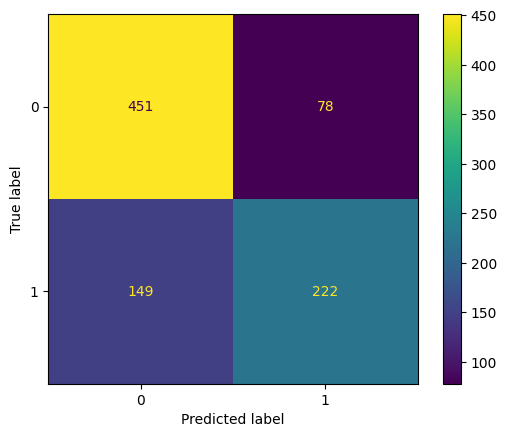

In [ ]:
# Examine the evaluation results on training data: confusion_matrix
cm = confusion_matrix(target_train, prediction_on_train_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on training data: accuracy, precision, recall, and f1-score
print(classification_report(target_train, prediction_on_train_KNN))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       529
           1       0.74      0.60      0.66       371

    accuracy                           0.75       900
   macro avg       0.75      0.73      0.73       900
weighted avg       0.75      0.75      0.74       900



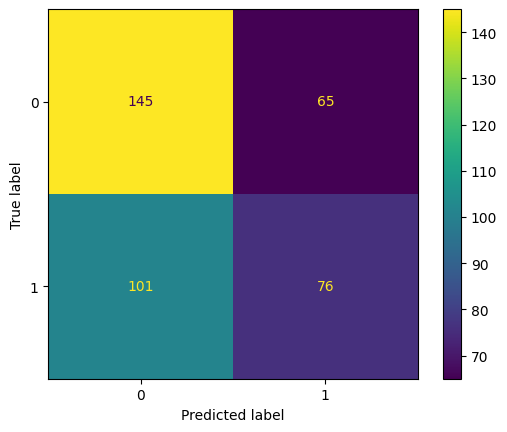

In [ ]:
# Examine the evaluation results on testing data: confusion_matrix
cm = confusion_matrix(target_test, prediction_on_test_KNN)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()

In [ ]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (1 points)
print(classification_report(target_test, prediction_on_test_KNN))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       210
           1       0.54      0.43      0.48       177

    accuracy                           0.57       387
   macro avg       0.56      0.56      0.56       387
weighted avg       0.57      0.57      0.56       387



In [ ]:
accuracy_knn = accuracy_score(target_test, prediction_on_test_KNN)
sensitivity_knn = recall_score(target_test, prediction_on_test_KNN, pos_label=1, average='binary')
print(f"KNN - Accuracy: {accuracy_knn}, Sensitivity: {sensitivity_knn}")

KNN - Accuracy: 0.5710594315245479, Sensitivity: 0.4293785310734463


###Comparisons

In [ ]:
# Print out the scores for verification
print(f"Decision Tree - Accuracy: {accuracy_dt}, Sensitivity: {sensitivity_dt}")
print(f"Naive Bayes - Accuracy: {accuracy_nb}, Sensitivity: {sensitivity_nb}")
print(f"KNN - Accuracy: {accuracy_knn}, Sensitivity: {sensitivity_knn}")

Decision Tree - Accuracy: 0.6382428940568475, Sensitivity: 0.3672316384180791
Naive Bayes - Accuracy: 0.5038759689922481, Sensitivity: 0.288135593220339
KNN - Accuracy: 0.5710594315245479, Sensitivity: 0.4293785310734463


In [ ]:
print("Decision Tree CV Mean Score:", np.mean(cv_scores))
print("Naïve Bayes CV Mean Score:", np.mean(cv_scores_nb))
print("KNN CV Mean Score:", np.mean(cv_scores_knn))

Decision Tree CV Mean Score: 0.47846650378547945
Naïve Bayes CV Mean Score: 0.4685518655928574
KNN CV Mean Score: 0.5330467830965523


In [ ]:
results_df = pd.DataFrame({
    'Model': ['Decision Tree', 'Naive Bayes', 'KNN'],
    'CV Mean Score': [np.mean(cv_scores), np.mean(cv_scores_nb), np.mean(cv_scores_knn)],})
print(results_df)

           Model  CV Mean Score
0  Decision Tree       0.478467
1    Naive Bayes       0.468552
2            KNN       0.533047


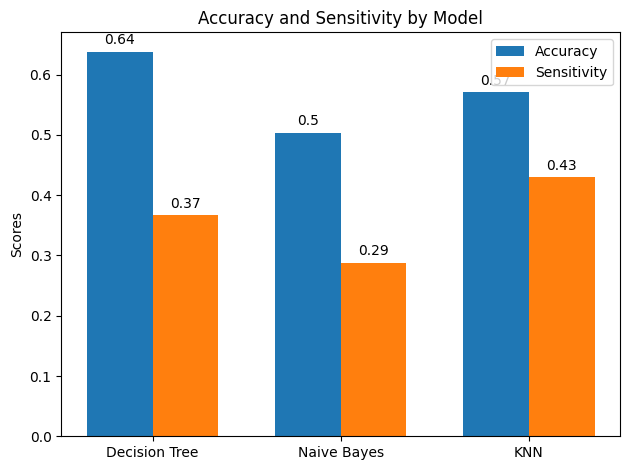

In [ ]:
# Model names
models = ['Decision Tree', 'Naive Bayes', 'KNN']

# Accuracy scores
accuracies = [accuracy_dt, accuracy_nb, accuracy_knn]

# Sensitivity scores
sensitivities = [sensitivity_dt, sensitivity_nb, sensitivity_knn]

# Setting up the bar chart
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracies, width, label='Accuracy')
rects2 = ax.bar(x + width/2, sensitivities, width, label='Sensitivity')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Accuracy and Sensitivity by Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#Performance Analysis

Decision Tree:
The model seems to have a moderate fit to the training data, with an accuracy of 0.63, as indicated by the classification report.
However, its performance drops slightly on the test set, with an accuracy of 0.52, suggesting some overfitting to the training data.<br>

Naive Bayes:
Based on the classification report for the training set, the Naive Bayes model shows a balanced performance but with a tendency to predict 'Yes' more accurately than 'No'.
Performance metrics specific to the test set are not directly provided but would be crucial for evaluating overfitting or underfitting.<br>

KNN:
The performance metrics for KNN are not detailed for the training and test sets. However, KNN models are known for their sensitivity to the feature space's scale and dimensionality, which might explain the lower CV mean score.<br>


#Summary and Insights

# Summary and Insights

**Introduction to the Study's Aims:**
This research aimed at dissecting the intricacies behind how counties across the U.S. decide on gaming legalization initiatives, using a robust dataset containing 1,287 distinct entries. By delving into how demographic, economic, and societal factors shape voting outcomes, the project sought to harness machine learning to forecast these decisions accurately.

**Preparation and Initial Analysis of Data:**
To ready the data for in-depth analysis, a thorough preprocessing was executed, which involved rectifying missing entries, scaling numerical data, and transforming categorical data. A diverse array of exploratory visual tools such as histograms, boxplots, and scatter plots were employed to reveal underlying patterns, detect outliers, and identify variables highly correlated with each other, thereby setting the stage for effective model building.

**Addressing Data Imbalance:**
A notable finding was the disproportionate representation in the 'Dependent Variable', with a 57.42% to 42.58% split between 'Yes' and 'No' responses. To mitigate bias and ensure a balanced analysis, undersampling methods were applied, ensuring both classes were equally represented in the dataset utilized for training our models.

**Constructing Predictive Models:**
The investigation proceeded with the development of three predictive models, specifically:<br>
**A Decision Tree (DT)** with a depth of 4, selected for its straightforward interpretability and ability to handle complex relational data structures.<br>
**Naïve Bayes (NB)**, appreciated for its capability to manage high-dimensional data efficiently, under the assumption of predictor independence.<br>
**K-Nearest Neighbors (KNN)**, chosen for its elemental approach and adaptability, requiring no presumptions about data distribution.<br>

**Evaluation Through Cross-Validation:**
Employing a 5-fold cross-validation technique provided a solid foundation for evaluating our models, revealing the inherent challenges in attaining a high degree of predictive accuracy and offering insights into model robustness.

**Comparative Analysis of Model Outcomes:**
Upon comparing the models on accuracy, sensitivity, and an analysis through confusion matrices, it was evident that the Decision Tree and Naïve Bayes shared comparable levels of performance, with the latter slightly surpassing in cross-validation scores. The KNN model trailed, emphasizing the prediction task's complexity.

**Identifying Key Influencers:**
An analysis of feature importance within the Decision Tree model pinpointed 'Percent Minority', 'Unemployment Rate', and 'Medium Family Income' as critical determinants of voting behavior, highlighting the profound impact of socio-economic variables on public decisions regarding gaming legislation.

**Final Reflections:**
This exploration illuminated the subtle dynamics at play between socio-economic factors and the stance on gaming legalization, revealing the multifaceted nature of such decisions. Despite the promising insights offered by the predictive models, their performance signals a need for further investigation with potentially more complex models or enriched data. This research not only enriches the dialogue surrounding gaming laws but also exemplifies the power of machine learning in untangling the web of societal decision-making processes.

In [ ]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth2.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth2.ipynb to html
[NbConvertApp] Writing 1724124 bytes to /content/drive/MyDrive/Colab Notebooks/SambarajuAchyuth2.html
